In [69]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

### Functions 

In [183]:
def rms(x):
    rms = np.sqrt(np.mean(x**2))
    return rms

In [185]:
def amplitude(rms_base, rms_freq):
    amp_db = 20*np.log10(rms_freq/rms_base)
    return amp_db

In [15]:
path = "C:/Users/ObiPC/OneDrive/Projects/Adaptive-Touch-Testing-System/Python_Codes/"
file = "1665660252.0832012_imu.csv"

### Load Raw data

In [16]:
df = pd.read_csv(path + file)
df

,Unnamed: 0,XVal,YVal,ZVal,time
0,0,-6.96,-7.55,-0.88,1.412610
1,1,-7.16,-7.55,-0.88,1.463475
2,2,-7.16,-7.55,-0.88,1.466467
3,3,-7.16,-7.45,-0.88,1.466467
4,4,-7.16,-7.45,-0.88,1.469460
...,...,...,...,...,...
73494,73494,-6.96,-7.55,-0.88,119.992368
73495,73495,-6.96,-7.55,-0.98,119.994363
73496,73496,-6.96,-7.55,-0.88,119.995361
73497,73497,-6.96,-7.55,-0.88,119.997355


<AxesSubplot:xlabel='time', ylabel='ZVal'>

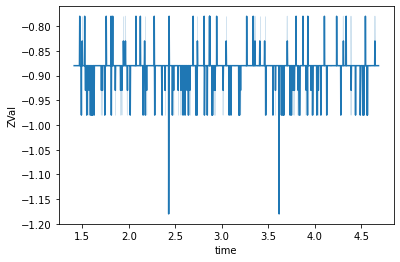

In [44]:
sb.lineplot(x='time', y='ZVal', data=df[0:2000])

In [174]:
sf = np.round(len(df)/120)
print('Sample rate: ', sf)

Sample rate:  612.0


### Resultant vector

In [181]:
resultantVec =  np.sqrt(df['XVal'].values**2 + df['YVal'].values**2 + df['ZVal'].values**2)
baselineRMS = np.nanmean(resultantVec[0:7000])

resultantVec = resultantVec - baselineRMS

resultantVec = resultantVec[10000:-1]

In [182]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# rms = sqrt(mean_squared_error(y_actual, y_predicted))

In [184]:
rms(baselineRMS)

10.280587742819513

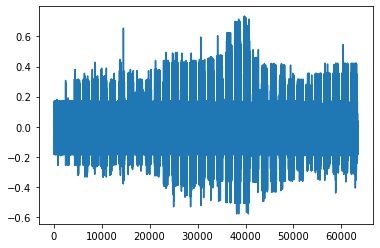

In [186]:
plt.plot(resultantVec)
# rms(resultantVec)

In [194]:
sf*2

1224.0

0.0626920021159099

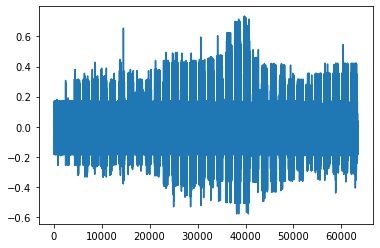

In [195]:
plt.plot(resultantVec)
baselineRMS = rms(resultantVec[0:int(sf*2)])
baselineRMS

In [190]:
peaks, val = find_peaks(resultantVec[0:19000],height=0.2)

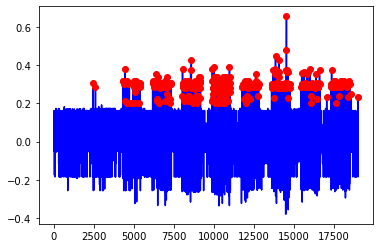

In [191]:
plt.plot(resultantVec[0:19000],'b')
# xvals = np.linspace(0,len(resultantVec[15000:-1]),len(resultantVec[15000:-1]))
plt.plot(peaks, resultantVec[0:19000][peaks],'ro')

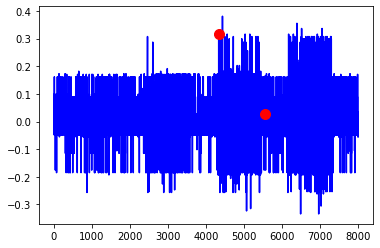

In [221]:
firstFreq = int(peaks[2])

firstFreqEnd = int(peaks[2]+(sf*2))

plt.plot(resultantVec[0:8000],'b')
plt.plot([firstFreq, firstFreqEnd], [resultantVec[firstFreq], resultantVec[firstFreqEnd]],'ro',ms=10)

In [241]:
baselineRMS

0.0626920021159099

Text(0, 0.5, 'Amp (dB)')

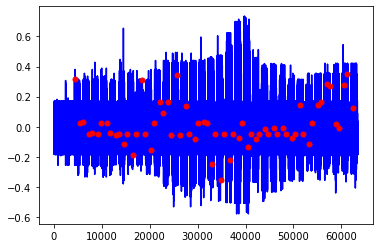

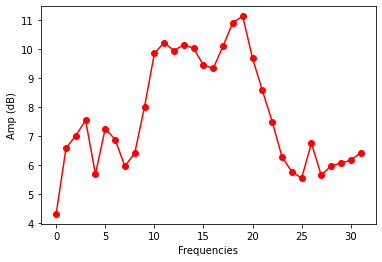

In [247]:
firstFreq = int(peaks[2])
firstFreqEnd = int(peaks[2]+(sf*2))

plt.plot(resultantVec[0:-1],'b')
rms_freq = []

for i in range(0,32):
    
    rms_freq_x = rms(resultantVec[firstFreq:firstFreqEnd])
    rms_freq.append(amplitude(baselineRMS, rms_freq_x))
    
    plt.plot([firstFreq, firstFreqEnd], [resultantVec[firstFreq], resultantVec[firstFreqEnd]],'ro',ms=5)

    firstFreq = int(firstFreq  + (3 * sf))
    firstFreqEnd = int(firstFreqEnd  + (3 * sf))


# plt.plot(resultantVec[0:8000],'b')
# plt.plot([firstFreq, firstFreqEnd], [resultantVec[firstFreq], resultantVec[firstFreqEnd]],'ro',ms=10)

Text(0, 0.5, 'Amp (dB)')

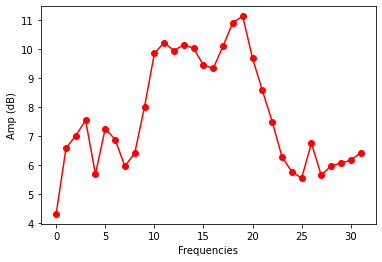

In [248]:
plt.figure()
plt.plot(rms_freq, 'r-o')
plt.xlabel('Frequencies')
plt.ylabel('Amp (dB)')
# plt.xticks([0:32])

In [209]:
firstFreqEnd

5558.0

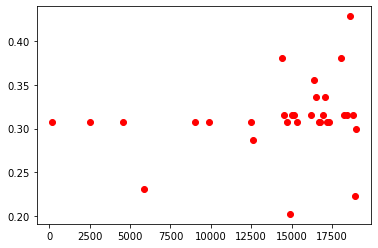

In [176]:
plt.plot(peaks, resultantVec[0:19000][peaks],'ro')

In [168]:
rms(resultantVec[18000:19000])

0.1421365447994054

In [170]:
amp_db_freq_1 = amplitude(baselineRMS,rms(resultantVec[18000:19000]))
amp_db_freq_2 = amplitude(baselineRMS,rms(resultantVec[20000:21000]))
amp_db_freq_3 = amplitude(baselineRMS,rms(resultantVec[21000:22000]))

amp_db_freq_2

6.774340403704803